# Import Libraries

In [3]:
pip install -r requirements.txt


In [1]:
import sys
import os

sys.path.append(os.path.abspath('.'))

In [3]:
from data_preprocessing.data_extractor import DataExtractor
from data_preprocessing.data_transformation import DataTransformer
import logging
import requests
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Extraction

In [4]:
extractor = DataExtractor()
fuelprice_data = extractor.fetch_api_data(endpoint_id="fuelprice")

2025-05-21 22:47:19,347 - Fetching data from https://api.data.gov.my/data-catalogue?id=fuelprice


# Sample Data & Data Exploration

In [5]:
# Check if data was successfully fetched
if fuelprice_data is not None and isinstance(fuelprice_data, list):

    sample_size = min(5, len(fuelprice_data))
    sample_data = fuelprice_data[:sample_size]  # Takes first 5 elements

    # Print or use the sample data
    print(f"Selected {sample_size} sample data points:")
    for i, item in enumerate(sample_data, 1):
        print(f"Sample {i}: {item}")
else:
    print("Failed to fetch data or data is empty.")

Selected 5 sample data points:
Sample 1: {'date': '2025-05-15', 'ron95': 2.05, 'ron97': 3.1, 'diesel': 2.8, 'series_type': 'level', 'diesel_eastmsia': 2.15}
Sample 2: {'date': '2025-05-15', 'ron95': 2.05, 'ron97': 3.07, 'diesel': 2.77, 'series_type': 'level', 'diesel_eastmsia': 2.15}
Sample 3: {'date': '2025-05-08', 'ron95': 2.05, 'ron97': 3.1, 'diesel': 2.8, 'series_type': 'level', 'diesel_eastmsia': 2.15}
Sample 4: {'date': '2025-05-01', 'ron95': 2.05, 'ron97': 3.18, 'diesel': 2.88, 'series_type': 'level', 'diesel_eastmsia': 2.15}
Sample 5: {'date': '2025-04-24', 'ron95': 2.05, 'ron97': 3.18, 'diesel': 2.88, 'series_type': 'level', 'diesel_eastmsia': 2.15}


In [6]:
# Convert data to df to ease exploration
df = pd.DataFrame(fuelprice_data)

In [7]:
# View total rows and columns
df.shape

(819, 6)

In [8]:
# View sample data
df.head(5)

,date,ron95,ron97,diesel,series_type,diesel_eastmsia
0,2025-05-15,2.05,3.10,2.80,level,2.15
1,2025-05-15,2.05,3.07,2.77,level,2.15
2,2025-05-08,2.05,3.10,2.80,level,2.15
3,2025-05-01,2.05,3.18,2.88,level,2.15
4,2025-04-24,2.05,3.18,2.88,level,2.15


In [9]:
# View data types
df.dtypes

date                object
ron95              float64
ron97              float64
diesel             float64
series_type         object
diesel_eastmsia    float64
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 819 entries, 0 to 818
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             819 non-null    object 
 1   ron95            819 non-null    float64
 2   ron97            819 non-null    float64
 3   diesel           819 non-null    float64
 4   series_type      819 non-null    object 
 5   diesel_eastmsia  819 non-null    float64
dtypes: float64(4), object(2)
memory usage: 38.5+ KB


In [11]:
# Numerical columns
df.describe()

,ron95,ron97,diesel,diesel_eastmsia
count,819.000000,819.000000,819.000000,819.000000
mean,1.013602,1.459524,1.112454,1.053944
std,1.020986,1.531300,1.139914,1.058583
min,-0.380000,-0.360000,-0.170000,-0.170000
25%,0.000000,0.000000,0.000000,0.000000
50%,1.250000,1.550000,1.400000,1.400000
75%,2.050000,2.730000,2.150000,2.150000
max,2.380000,4.840000,3.350000,2.340000


In [12]:
# Categorical columns
df.describe(include='object')

,date,series_type
count,819,819
unique,409,2
top,2025-05-15,level
freq,4,410


In [13]:
# Max date
max_date = df['date'].max()
max_date

'2025-05-15'

In [14]:
# Min date
min_date = df['date'].min()
min_date

'2017-03-30'

In [43]:
df['series_type'].unique()

array(['level', 'change_weekly'], dtype=object)

# Data Transformation

In [44]:
transformer = DataTransformer(fuelprice_data)
cleaned_df = transformer.transform_fuel_data()

In [45]:
# View sample data
cleaned_df.head(5).style.set_properties(**{'text-align': 'left'})

,price_date,ron95_price,ron97_price,diesel_price,series_type,diesel_eastmsia,ron95_week_diff,ron97_week_diff,diesel_week_diff,ron95_4wk_avg,ron97_4wk_avg,diesel_4wk_avg,year,month,ron95_cumulative_change,ron97_cumulative_change,diesel_cumulative_change,ron95_price_increase,ron97_price_increase,diesel_price_increase,ron95_pct_change,ron97_pct_change,diesel_pct_change
0,2017-03-30 00:00:00,2.130000,2.410000,2.110000,level,2.110000,None,None,None,None,None,None,2017,3,0.000000,0.000000,0.000000,0,0,0,None,None,None
1,2017-04-06 00:00:00,2.160000,2.430000,2.080000,level,2.080000,0.030000,0.020000,-0.030000,None,None,None,2017,4,0.030000,0.020000,-0.030000,1,1,0,1.408451,0.829876,-1.421801
2,2017-04-06 00:00:00,0.030000,0.020000,-0.030000,change_weekly,-0.030000,-2.130000,-2.410000,-2.110000,None,None,None,2017,4,-2.100000,-2.390000,-2.140000,0,0,0,-98.611111,-99.176955,-101.442308
3,2017-04-13 00:00:00,0.080000,0.090000,0.080000,change_weekly,0.080000,0.050000,0.070000,0.110000,1.100000,1.237500,1.060000,2017,4,-2.050000,-2.320000,-2.030000,1,1,1,166.666667,350.000000,-366.666667
4,2017-04-13 00:00:00,2.240000,2.520000,2.160000,level,2.160000,2.160000,2.430000,2.080000,1.127500,1.265000,1.072500,2017,4,0.110000,0.110000,0.050000,1,1,1,2700.000000,2700.000000,2600.000000


# Data Visualization

## Fuel Price Trends from 2017 - 2025

Key Findings:

1. As observed, the changes between fuel prices from 2017 to 2019 are relatively stable. However, a sharp decline occurred between 2020 and 2021, likely due to reduced demand during the covid-19 pandemic. Prices gradually recovered in the post-pandemic period as economic activity resumed.

2. In 2022 - 2023, ron97 prices experienced a significant spike, while diesel prices surged in mid-2024 and continued rising into early of 2025. These fluctuations reflect global oil market trends under the automatic pricing mechanism (apm). In contrast, ron95 prices remained stable due to government subsidies. While ron97 and diesel prices adjust regularly, ron95 maintains a fixed price for extended periods.

<Figure size 1200x600 with 0 Axes>

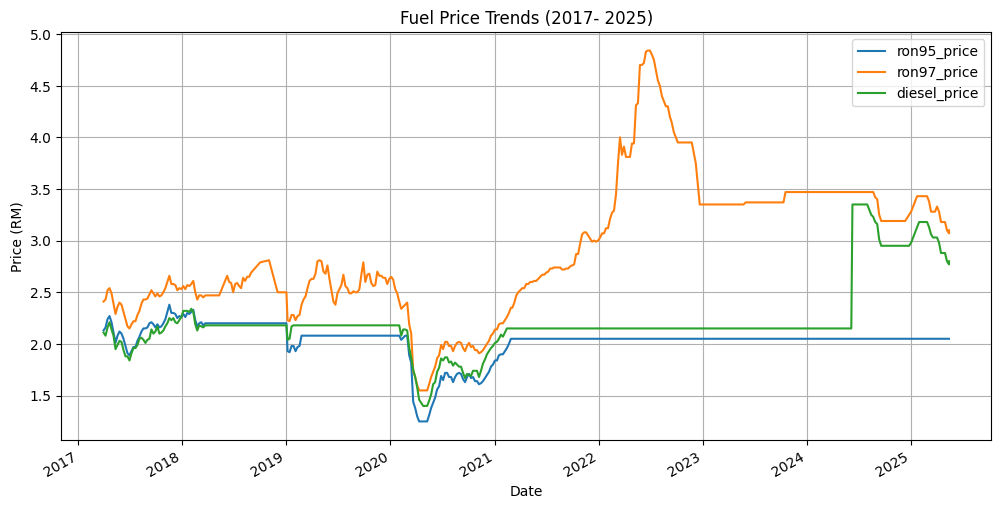

In [46]:
plt.figure(figsize=(12,6))
cleaned_df[cleaned_df['series_type'] == 'level'].plot(
    x='price_date',
    y=['ron95_price', 'ron97_price', 'diesel_price'],
    title=f"Fuel Price Trends (2017- {cleaned_df['price_date'].dt.year.max()})",  # Fixed: Use 'price_date' and .dt.year.max()
    figsize=(12, 6)
)
plt.ylabel('Price (RM)')
plt.xlabel('Date')
plt.grid(True)

## Monthly Fuel Price Trends By Year

Key Findings:

1. Throughout the year, ron97 consistently records the highest fuel prices, peaking at over RM4.50 in mid-2022 (June - July). In contrast, the prices of ron95 and diesel remain relatively stable and close to each other, hovering around RM2.00 to RM2.50. A slight spike occurred in July 2024, when diesel prices rose to RM3.00 following the government’s decision to remove diesel subsidies as part of the budi madani initiative, a measure designed to better target subsidies toward those in need.

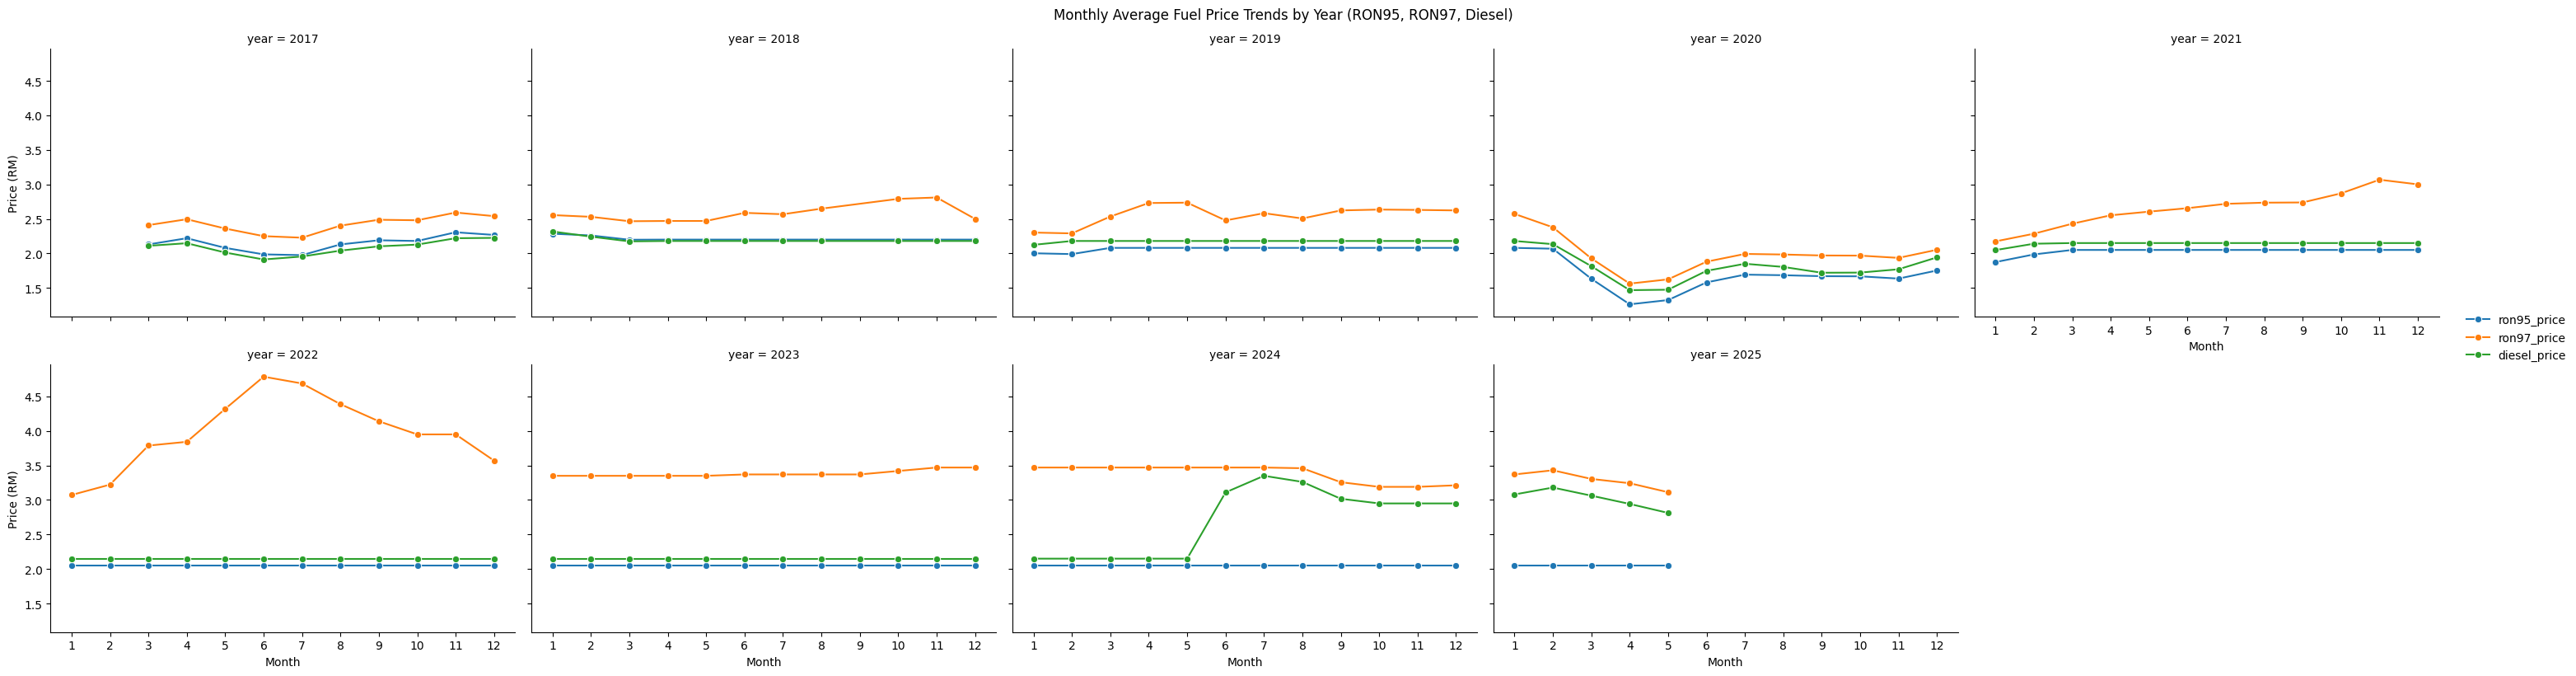

In [47]:
monthly_avg = cleaned_df[cleaned_df['series_type'] == 'level'].groupby(['year', 'month'])[['ron95_price', 'ron97_price', 'diesel_price']].mean().reset_index()

monthly_avg_melted = monthly_avg.melt(
    id_vars=['year', 'month'],
    value_vars=['ron95_price', 'ron97_price', 'diesel_price'],
    var_name='fuel_type',
    value_name='price'
)

monthly_avg_trend = sns.FacetGrid(monthly_avg_melted, col='year', col_wrap=5, height=4, aspect=1.5)
monthly_avg_trend.map(sns.lineplot, 'month', 'price', 'fuel_type', marker='o')
monthly_avg_trend.add_legend()
monthly_avg_trend.set_axis_labels('Month', 'Price (RM)')
plt.suptitle("Monthly Average Fuel Price Trends by Year (RON95, RON97, Diesel)", y=1.02)
plt.xticks(range(1, 13))
plt.show()

## Weekly Difference for each fuel types

Key Findings:

1. It can be observed that ron97 has the hightest weekly difference in year 2022 and 2023, which could be beyond RM4.
2. In the mid of 2024 and 2025, diesel price spiked up and therefore the difference are larger compared to the previous years.

In [48]:
weekly_changes = cleaned_df[cleaned_df['series_type']=='change_weekly'][['ron95_week_diff','ron97_week_diff','diesel_week_diff']].describe()
print(weekly_changes)

        ron95_week_diff  ron97_week_diff  diesel_week_diff
count            409.00           409.00            409.00
unique            80.00           186.00            102.00
top               -2.05            -3.47             -2.15
freq             178.00            35.00            136.00


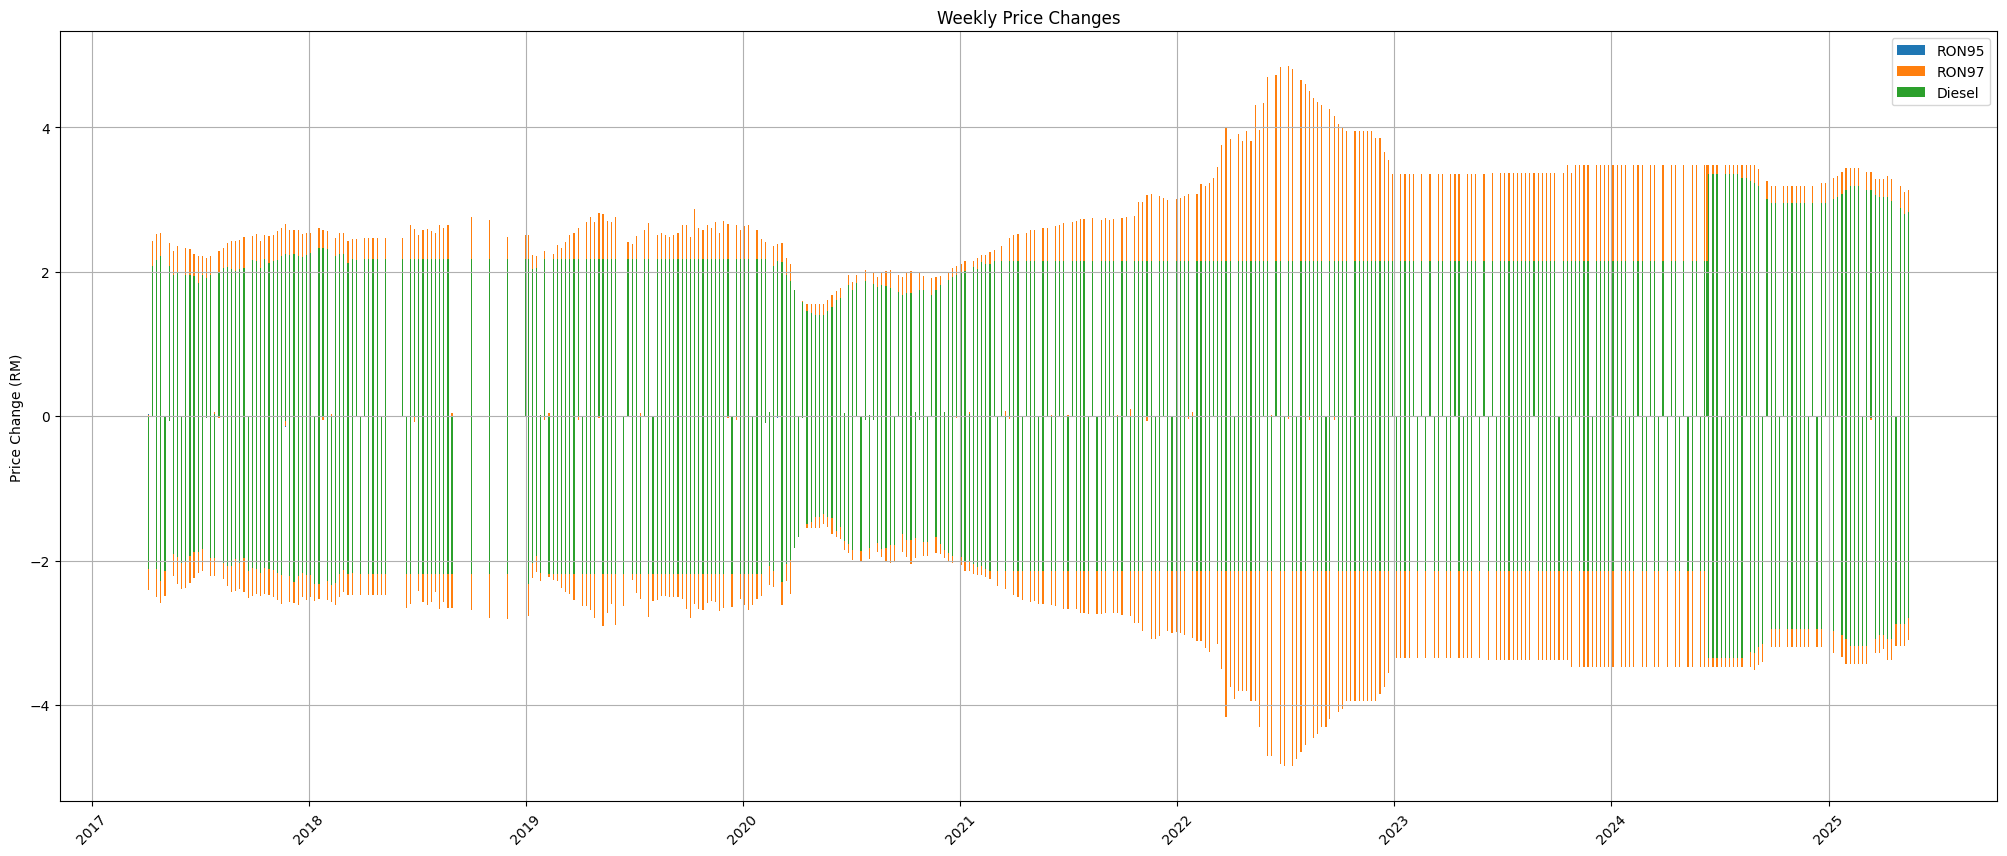

In [49]:
fig, ax = plt.subplots(figsize=(25, 10))
df_plot = cleaned_df.dropna(subset=['ron95_week_diff', 'ron97_week_diff', 'diesel_week_diff'])

ax.bar(df_plot['price_date'], df_plot['ron95_week_diff'], width=2, label='RON95')
ax.bar(df_plot['price_date'], df_plot['ron97_week_diff'], width=2, label='RON97')
ax.bar(df_plot['price_date'], df_plot['diesel_week_diff'], width=2, label='Diesel')
ax.set_title("Weekly Price Changes")
ax.set_ylabel("Price Change (RM)")
ax.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## Monthly Fuel Price Distributions

## Ron 95

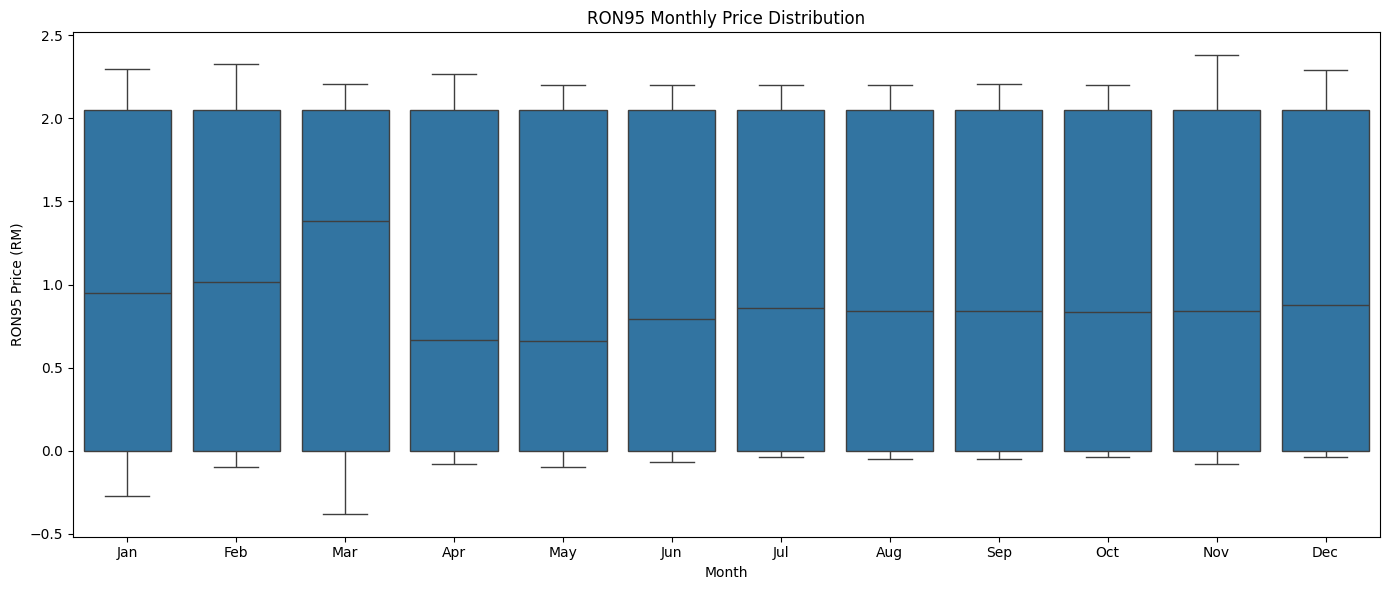

In [50]:
cleaned_df['month_name'] = cleaned_df['price_date'].dt.strftime('%b')

plt.figure(figsize=(14, 6))
sns.boxplot(data=cleaned_df, x='month_name', y='ron95_price', order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                                             'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title('RON95 Monthly Price Distribution')
plt.xlabel('Month')
plt.ylabel('RON95 Price (RM)')
plt.tight_layout()
plt.show()


## Ron 97

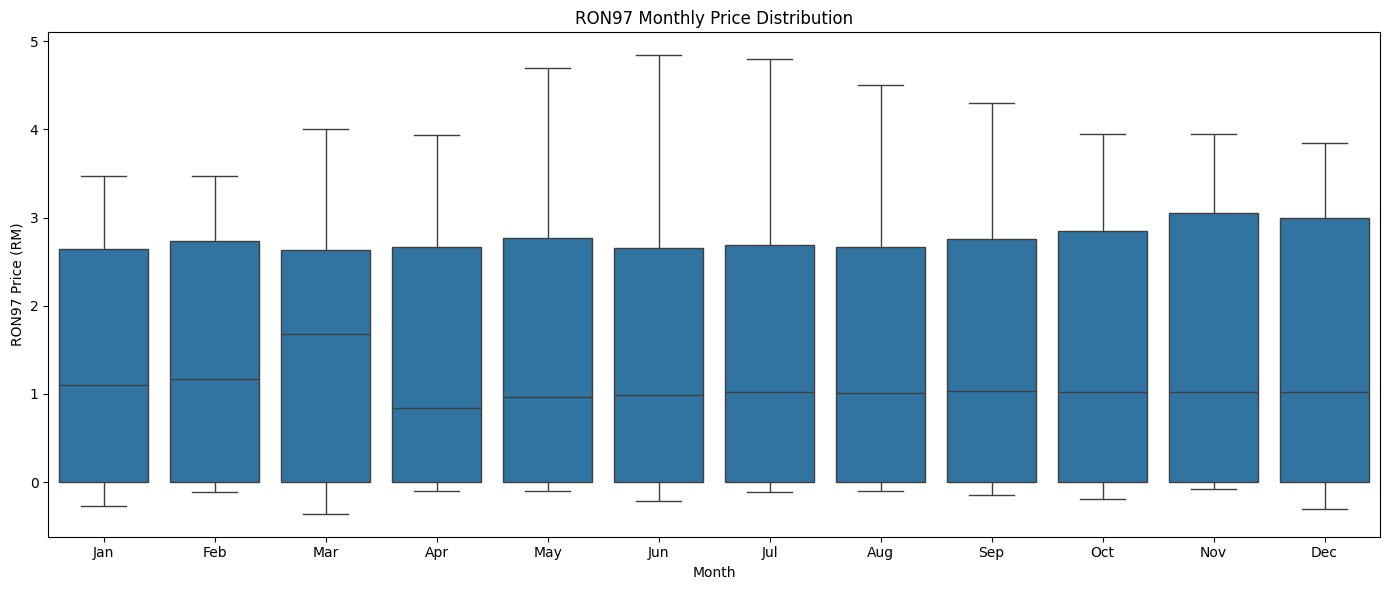

In [51]:
cleaned_df['month_name'] = cleaned_df['price_date'].dt.strftime('%b')

plt.figure(figsize=(14, 6))
sns.boxplot(data=cleaned_df, x='month_name', y='ron97_price', order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                                             'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title('RON97 Monthly Price Distribution')
plt.xlabel('Month')
plt.ylabel('RON97 Price (RM)')
plt.tight_layout()
plt.show()


## Diesel

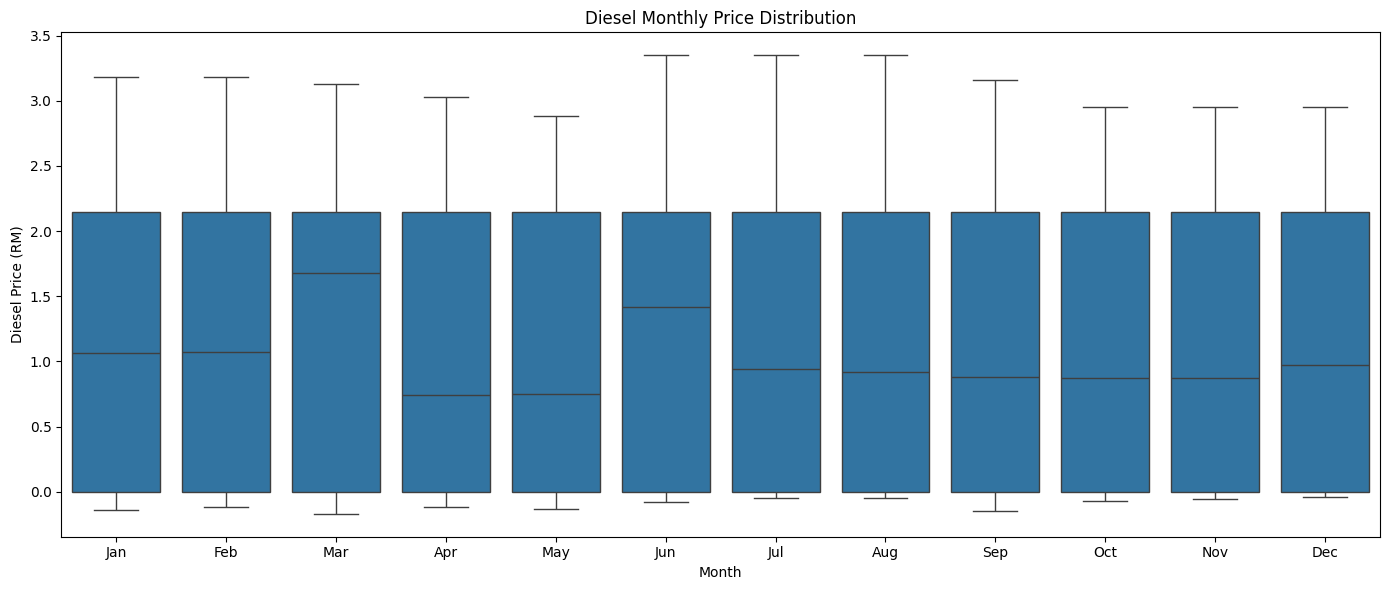

In [52]:
cleaned_df['month_name'] = cleaned_df['price_date'].dt.strftime('%b')

plt.figure(figsize=(14, 6))
sns.boxplot(data=cleaned_df, x='month_name', y='diesel_price', order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                                             'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title('Diesel Monthly Price Distribution')
plt.xlabel('Month')
plt.ylabel('Diesel Price (RM)')
plt.tight_layout()
plt.show()


## Diesel price diff between east and west msia
Key Findings:
1. It can be observed that in the year of 2024 has a greater change in diesel price which due to the removal of diesel subsidy from Msia government
2. Deep diving in to year 2024, it can clearly be seens that the price of diesel in west malaysia increases around RM1.50 compared to east malaysia.

In [53]:
# Diesel price diff between east and west msia
cleaned_df['diesel_price_diff'] = cleaned_df['diesel_eastmsia'] - cleaned_df['diesel_price']

print(f"Average price difference: {cleaned_df['diesel_price_diff'].mean():.2f}")
print(f"Maximum difference: {cleaned_df['diesel_price_diff'].max():.2f}")

Average price difference: -0.06
Maximum difference: 0.15


In [54]:
cleaned_df['diesel_price_diff'].describe()

count    819.000000
mean      -0.058510
std        0.231957
min       -1.200000
25%        0.000000
50%        0.000000
75%        0.000000
max        0.150000
Name: diesel_price_diff, dtype: float64

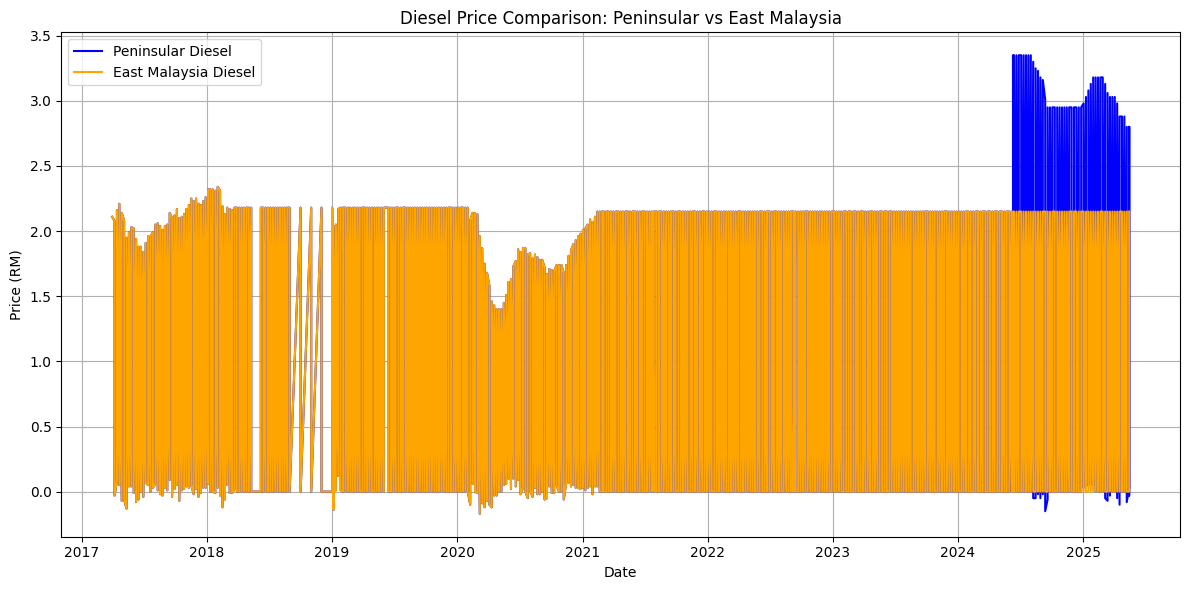

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(cleaned_df['price_date'], cleaned_df['diesel_price'], label='Peninsular Diesel', color='blue')
plt.plot(cleaned_df['price_date'], cleaned_df['diesel_eastmsia'], label='East Malaysia Diesel', color='orange')
plt.title('Diesel Price Comparison: Peninsular vs East Malaysia')
plt.xlabel('Date')
plt.ylabel('Price (RM)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [59]:
# Further filter dataframe to view price difference
df_2024 = cleaned_df[cleaned_df['year'] >= 2024]

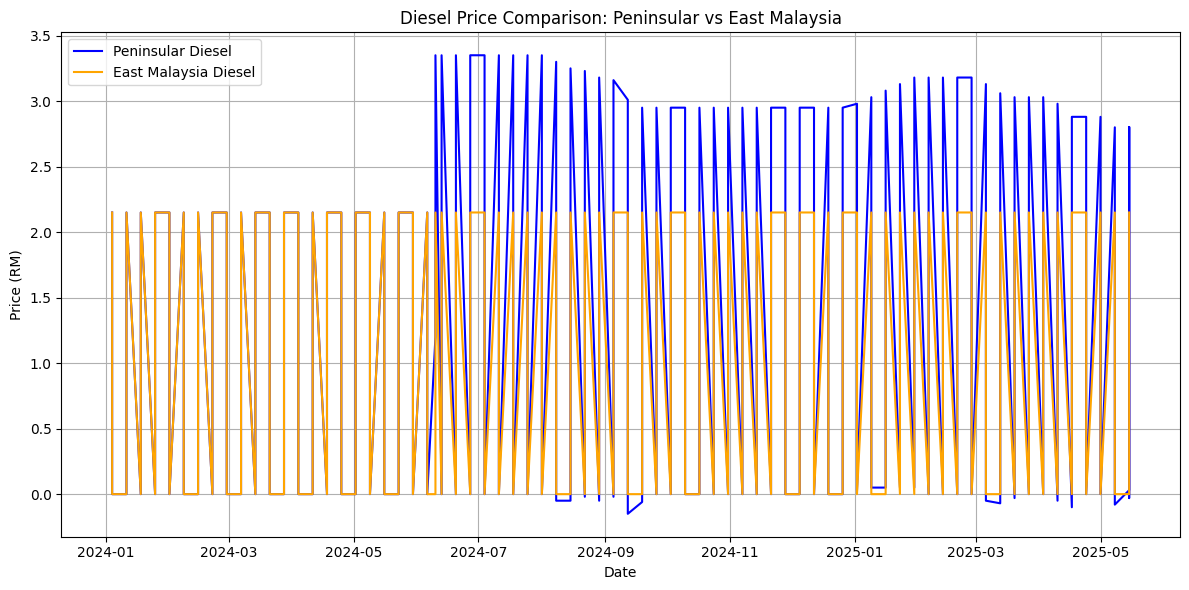

In [60]:
plt.figure(figsize=(12, 6))
plt.plot(df_2024['price_date'], df_2024['diesel_price'], label='Peninsular Diesel', color='blue')
plt.plot(df_2024['price_date'], df_2024['diesel_eastmsia'], label='East Malaysia Diesel', color='orange')
plt.title('Diesel Price Comparison: Peninsular vs East Malaysia')
plt.xlabel('Date')
plt.ylabel('Price (RM)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()